In [1]:
import pandas as pd
import os
from draft_config.config_params import get_config
import matplotlib.pyplot as plt
import sqlite3
import numpy as np 

In [2]:
root = os.path.dirname(os.getcwd()) + '/' # Because of notebook details
params = get_config()
connection_string = f'{root}{params.db_path}'
print(connection_string)
connection = sqlite3.connect(f'{root}{params.db_path}')
cursor = connection.cursor()

c:\Users\omara\Desktop\workspace\nba_draft_prediction/etl/nba.db


In [3]:
# See the table names in the database
table_names_execution = cursor.execute("""SELECT name from sqlite_master WHERE type='table';""")
table_names_fetched = table_names_execution.fetchall()

print(table_names_fetched)

[('draft_data_raw',), ('ncaa_data_raw',)]


In [4]:
draft_df = pd.read_sql_query(sql="""SELECT * FROM draft_data_raw;""", con=connection)
ncaa_df = pd.read_sql_query(sql="""SELECT * FROM ncaa_data_raw""", con=connection)

# NBA Draft Data Exploration

In [5]:
# Starting with the raw draft data
draft_df

,player,team,affiliation,year,round_number,round_pick,overall_pick
0,Victor Wembanyama,San Antonio Spurs,Metropolitans 92 (France),2023,1,1,1
1,Brandon Miller,Charlotte Hornets,Alabama,2023,1,2,2
2,Scoot Henderson,Portland Trail Blazers,Ignite (G League),2023,1,3,3
3,Amen Thompson,Houston Rockets,Overtime Elite,2023,1,4,4
4,Ausar Thompson,Detroit Pistons,Overtime Elite,2023,1,5,5
...,...,...,...,...,...,...,...
8252,Mark Jellison,Capital Bullets,Northeastern,1973,8,13,133
8253,Steve Rowell,New York Knicks,Rhode Island,1973,8,14,134
8254,Walt McGrary,Milwaukee Bucks,Tennessee-Chattanooga,1973,8,15,135
8255,Roy McPipe,Los Angeles Lakers,Montana State,1973,8,16,136


In [6]:
# Looking at how many players come from each affiliation overall
overall_counts = draft_df[['affiliation', 'player']].groupby(by='affiliation', sort=True).count()
overall_counts = overall_counts.reset_index()
overall_counts = overall_counts.sort_values(by='player', ascending=False)
overall_counts

,affiliation,player
405,Kentucky,141
148,California-Los Angeles,126
554,North Carolina,116
239,Duke,109
401,Kansas,91
...,...,...
412,LSU-Atletas (Lithuania),1
666,Rochester Tech,1
665,Rochester (NY),1
414,La Verne,1


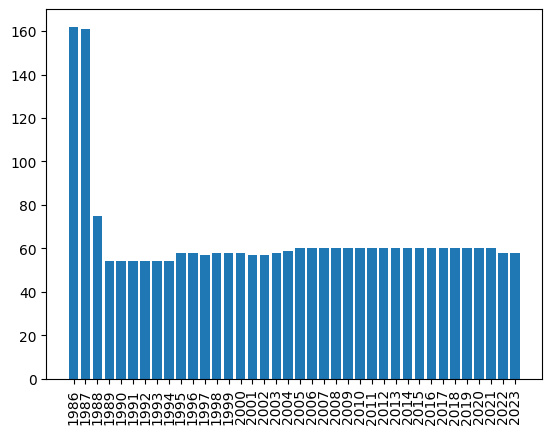

In [7]:
counts_by_year = draft_df[['affiliation', 'player', 'year']].groupby(by='year', sort=True).count()
counts_by_year = counts_by_year.reset_index()
counts_by_year = counts_by_year[counts_by_year['year']>'1985']
plt.bar(counts_by_year['year'], counts_by_year['player'])
plt.xticks(rotation=90)
plt.show()
# Roughly 60 people per year have been drafted into the NBA since 1989. This is an important deduction for later

In [8]:
new_counts = draft_df[draft_df['year'] >= '2015'][['affiliation', 'player']].groupby(by='affiliation', sort=True).count()
new_counts = new_counts.reset_index()
new_counts = new_counts.sort_values(by='player', ascending=False)
new_counts 

,affiliation,player
76,Kentucky,28
38,Duke,26
26,California-Los Angeles,12
91,Michigan,11
74,Kansas,11
...,...,...
63,Illinois,1
62,Illawarra (Australia),1
58,Hofstra,1
57,Hapoel Galil Elyon (Israel),1


In [9]:
len(set(new_counts['affiliation']))

175

In [10]:
new_counts['player'].sum()

536

# NCAA data exploration

In [11]:
ncaa_df

,rank,name,university,position,games_played,minutes_per_game,points_per_game,average_field_goals_made,average_field_goals_attempted,field_goal_percentage,...,three_point_field_goal_percentage,average_free_throws_made,average_free_throws_attempted,free_throws_percentage,rebounds_per_game,assists_per_game,steals_per_game,blocks_per_game,turnovers_per_game,ncaa_year
0,1,Ruben Douglas,UNM,G,28,35.1,28.0,7.8,19.6,39.7,...,39.5,39.7,10.8,84.1,6.6,2.1,1.3,0.3,3.9,2002-03
1,2,Henry Domercant,EIU,G,29,33.7,27.9,8.7,19.0,45.8,...,42.4,45.8,9.1,84.4,6.9,2.8,1.4,0.5,2.4,2002-03
2,3,Mike Helms,OAK,G,28,34.5,26.9,8.6,19.0,45.2,...,37.9,45.2,9.4,74.5,4.0,2.0,1.4,0.3,3.8,2002-03
3,4,Michael Watson,KC,G,29,38.8,25.5,8.5,22.6,37.7,...,35.0,37.7,5.9,75.3,3.7,3.8,1.4,0.2,3.7,2002-03
4,5,Troy Bell,BC,G,31,38.6,25.2,7.2,16.4,44.1,...,40.2,44.1,8.6,84.7,4.6,3.7,2.3,0.2,2.5,2002-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18832,3277,Marcus Filien,ALB,F,10,5.8,0.2,0.0,0.4,0.0,...,0.0,0.0,0.2,100.0,1.5,0.0,0.2,0.4,0.2,2023-24
18833,3278,Syrus Grisby,PV,F,7,8.4,0.1,0.0,1.0,0.0,...,0.0,0.0,0.3,50.0,1.7,0.4,0.3,0.4,0.4,2023-24
18834,3279,Jeremiah Bembry,WVU,G,7,3.3,0.0,0.0,0.7,0.0,...,0.0,0.0,0.1,0.0,0.4,0.4,0.0,0.0,0.0,2023-24
18835,3279,Cedric Lath,HOU,C,8,2.9,0.0,0.0,0.4,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.3,2023-24


In [12]:
ncaa_df.columns

Index(['rank', 'name', 'university', 'position', 'games_played',
       'minutes_per_game', 'points_per_game', 'average_field_goals_made',
       'average_field_goals_attempted', 'field_goal_percentage',
       'average_three_point_field_goals_made',
       'average_three_point_field_goals_attempted',
       'three_point_field_goal_percentage', 'average_free_throws_made',
       'average_free_throws_attempted', 'free_throws_percentage',
       'rebounds_per_game', 'assists_per_game', 'steals_per_game',
       'blocks_per_game', 'turnovers_per_game', 'ncaa_year'],
      dtype='object')

In [13]:
# We'll want to look at the dynamics for each draft year

## It seems that the number of college players tracked with time is inconsistent. ESPN is a well-known source platform and likely has reliable information
ncaa_df[['ncaa_year','name']].reset_index().groupby(by='ncaa_year').count().sort_values(by='ncaa_year', ascending=False) 

,index,name
ncaa_year,,
2023-24,3281,3281
2022-23,500,500
2021-22,700,700
2020-21,2905,2905
2019-20,450,450
2018-19,450,450
2017-18,650,650
2015-16,500,500
2014-15,250,250


In [14]:
# Given that the draft only takes about 60 people a year, let's try and look at NCAA stats over the past 6 years


# Convert NCAA columns to values as needed
ncaa_df[['minutes_per_game', 'points_per_game', 'average_field_goals_made',
       'average_field_goals_attempted', 'field_goal_percentage',
       'average_three_point_field_goals_made',
       'average_three_point_field_goals_attempted',
       'three_point_field_goal_percentage', 'average_free_throws_made',
       'average_free_throws_attempted', 'free_throws_percentage',
       'rebounds_per_game', 'assists_per_game', 'steals_per_game',
       'blocks_per_game', 'turnovers_per_game']] = ncaa_df[['minutes_per_game', 'points_per_game', 'average_field_goals_made',
       'average_field_goals_attempted', 'field_goal_percentage',
       'average_three_point_field_goals_made',
       'average_three_point_field_goals_attempted',
       'three_point_field_goal_percentage', 'average_free_throws_made',
       'average_free_throws_attempted', 'free_throws_percentage',
       'rebounds_per_game', 'assists_per_game', 'steals_per_game',
       'blocks_per_game', 'turnovers_per_game']].astype(np.float64)

ncaa_df['games_played'] = ncaa_df['games_played'].astype(np.int32)

In [15]:
ncaa_df.dtypes

rank                                          object
name                                          object
university                                    object
position                                      object
games_played                                   int32
minutes_per_game                             float64
points_per_game                              float64
average_field_goals_made                     float64
average_field_goals_attempted                float64
field_goal_percentage                        float64
average_three_point_field_goals_made         float64
average_three_point_field_goals_attempted    float64
three_point_field_goal_percentage            float64
average_free_throws_made                     float64
average_free_throws_attempted                float64
free_throws_percentage                       float64
rebounds_per_game                            float64
assists_per_game                             float64
steals_per_game                              f

<Axes: >

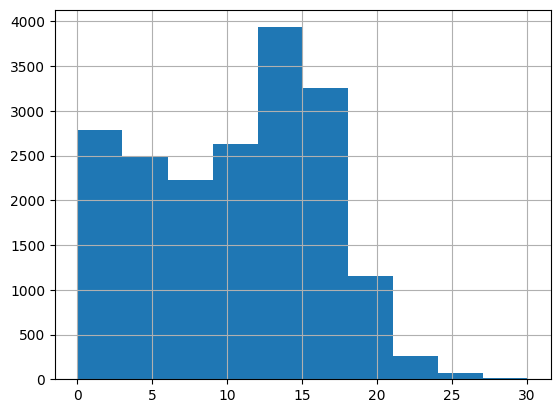

In [16]:
ncaa_df['points_per_game'].hist()

In [17]:
# Position Information
tmp_counts = ncaa_df[['position', 'name', 'ncaa_year']].groupby(by=['ncaa_year', 'position']).count().reset_index()
tmp_counts

,ncaa_year,position,name
0,2002-03,C,2
1,2002-03,F,36
2,2002-03,F-C,2
3,2002-03,G,59
4,2002-03,G-F,1
...,...,...,...
106,2023-24,G,1954
107,2023-24,PF,2
108,2023-24,PG,3
109,2023-24,SF,1


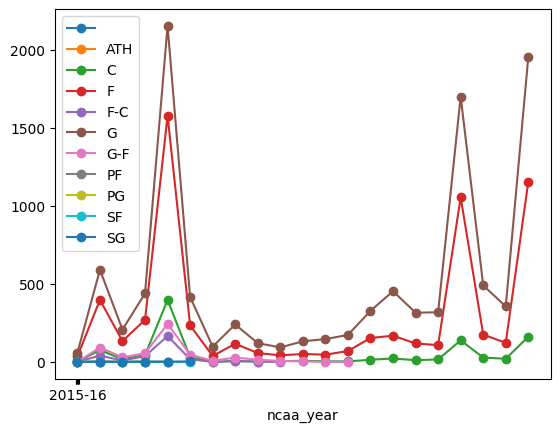

In [18]:
tmp_counts.set_index('ncaa_year').groupby('position')['name'].plot(marker='o', linestyle='-', legend=True)
plt.show()

# Combining them for more exploratory purposes

In [19]:
ncaa_df.head()

,rank,name,university,position,games_played,minutes_per_game,points_per_game,average_field_goals_made,average_field_goals_attempted,field_goal_percentage,...,three_point_field_goal_percentage,average_free_throws_made,average_free_throws_attempted,free_throws_percentage,rebounds_per_game,assists_per_game,steals_per_game,blocks_per_game,turnovers_per_game,ncaa_year
0,1,Ruben Douglas,UNM,G,28,35.1,28.0,7.8,19.6,39.7,...,39.5,39.7,10.8,84.1,6.6,2.1,1.3,0.3,3.9,2002-03
1,2,Henry Domercant,EIU,G,29,33.7,27.9,8.7,19.0,45.8,...,42.4,45.8,9.1,84.4,6.9,2.8,1.4,0.5,2.4,2002-03
2,3,Mike Helms,OAK,G,28,34.5,26.9,8.6,19.0,45.2,...,37.9,45.2,9.4,74.5,4.0,2.0,1.4,0.3,3.8,2002-03
3,4,Michael Watson,KC,G,29,38.8,25.5,8.5,22.6,37.7,...,35.0,37.7,5.9,75.3,3.7,3.8,1.4,0.2,3.7,2002-03
4,5,Troy Bell,BC,G,31,38.6,25.2,7.2,16.4,44.1,...,40.2,44.1,8.6,84.7,4.6,3.7,2.3,0.2,2.5,2002-03


In [20]:
draft_df.head()

,player,team,affiliation,year,round_number,round_pick,overall_pick
0,Victor Wembanyama,San Antonio Spurs,Metropolitans 92 (France),2023,1,1,1
1,Brandon Miller,Charlotte Hornets,Alabama,2023,1,2,2
2,Scoot Henderson,Portland Trail Blazers,Ignite (G League),2023,1,3,3
3,Amen Thompson,Houston Rockets,Overtime Elite,2023,1,4,4
4,Ausar Thompson,Detroit Pistons,Overtime Elite,2023,1,5,5


In [21]:
# Get all of the drafted athletes. How? By joining the tables!
new_df = pd.merge(left=draft_df, right=ncaa_df, how='right', left_on='player', right_on='name') # Right join because the keys from the right will contain all college athletes, not just the ones that made it to the NBA
new_df

,player,team,affiliation,year,round_number,round_pick,overall_pick,rank,name,university,...,three_point_field_goal_percentage,average_free_throws_made,average_free_throws_attempted,free_throws_percentage,rebounds_per_game,assists_per_game,steals_per_game,blocks_per_game,turnovers_per_game,ncaa_year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Ruben Douglas,UNM,...,39.5,39.7,10.8,84.1,6.6,2.1,1.3,0.3,3.9,2002-03
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,Henry Domercant,EIU,...,42.4,45.8,9.1,84.4,6.9,2.8,1.4,0.5,2.4,2002-03
2,Mike Helms,Houston Rockets,Wake Forest,1982,7,16,154,3,Mike Helms,OAK,...,37.9,45.2,9.4,74.5,4.0,2.0,1.4,0.3,3.8,2002-03
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,Michael Watson,KC,...,35.0,37.7,5.9,75.3,3.7,3.8,1.4,0.2,3.7,2002-03
4,Troy Bell,Boston Celtics,Boston College,2003,1,16,16,5,Troy Bell,BC,...,40.2,44.1,8.6,84.7,4.6,3.7,2.3,0.2,2.5,2002-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3277,Marcus Filien,ALB,...,0.0,0.0,0.2,100.0,1.5,0.0,0.2,0.4,0.2,2023-24
18920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3278,Syrus Grisby,PV,...,0.0,0.0,0.3,50.0,1.7,0.4,0.3,0.4,0.4,2023-24
18921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3279,Jeremiah Bembry,WVU,...,0.0,0.0,0.1,0.0,0.4,0.4,0.0,0.0,0.0,2023-24
18922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3279,Cedric Lath,HOU,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.3,2023-24


In [22]:
new_df.columns 

Index(['player', 'team', 'affiliation', 'year', 'round_number', 'round_pick',
       'overall_pick', 'rank', 'name', 'university', 'position',
       'games_played', 'minutes_per_game', 'points_per_game',
       'average_field_goals_made', 'average_field_goals_attempted',
       'field_goal_percentage', 'average_three_point_field_goals_made',
       'average_three_point_field_goals_attempted',
       'three_point_field_goal_percentage', 'average_free_throws_made',
       'average_free_throws_attempted', 'free_throws_percentage',
       'rebounds_per_game', 'assists_per_game', 'steals_per_game',
       'blocks_per_game', 'turnovers_per_game', 'ncaa_year'],
      dtype='object')

In [23]:
new_df = new_df[['rank', 'name', 'player', 'team', 'affiliation', 'university', 'year', 'ncaa_year', 'position',
       'games_played', 'minutes_per_game', 'points_per_game',
       'average_field_goals_made', 'average_field_goals_attempted',
       'field_goal_percentage', 'average_three_point_field_goals_made',
       'average_three_point_field_goals_attempted',
       'three_point_field_goal_percentage', 'average_free_throws_made',
       'average_free_throws_attempted', 'free_throws_percentage',
       'rebounds_per_game', 'assists_per_game', 'steals_per_game',
       'blocks_per_game', 'turnovers_per_game']]

In [24]:
new_df

,rank,name,player,team,affiliation,university,year,ncaa_year,position,games_played,...,average_three_point_field_goals_attempted,three_point_field_goal_percentage,average_free_throws_made,average_free_throws_attempted,free_throws_percentage,rebounds_per_game,assists_per_game,steals_per_game,blocks_per_game,turnovers_per_game
0,1,Ruben Douglas,NaN,NaN,NaN,UNM,NaN,2002-03,G,28,...,8.5,39.5,39.7,10.8,84.1,6.6,2.1,1.3,0.3,3.9
1,2,Henry Domercant,NaN,NaN,NaN,EIU,NaN,2002-03,G,29,...,6.8,42.4,45.8,9.1,84.4,6.9,2.8,1.4,0.5,2.4
2,3,Mike Helms,Mike Helms,Houston Rockets,Wake Forest,OAK,1982,2002-03,G,28,...,7.0,37.9,45.2,9.4,74.5,4.0,2.0,1.4,0.3,3.8
3,4,Michael Watson,NaN,NaN,NaN,KC,NaN,2002-03,G,29,...,11.6,35.0,37.7,5.9,75.3,3.7,3.8,1.4,0.2,3.7
4,5,Troy Bell,Troy Bell,Boston Celtics,Boston College,BC,2003,2002-03,G,31,...,8.5,40.2,44.1,8.6,84.7,4.6,3.7,2.3,0.2,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18919,3277,Marcus Filien,NaN,NaN,NaN,ALB,NaN,2023-24,F,10,...,0.2,0.0,0.0,0.2,100.0,1.5,0.0,0.2,0.4,0.2
18920,3278,Syrus Grisby,NaN,NaN,NaN,PV,NaN,2023-24,F,7,...,0.0,0.0,0.0,0.3,50.0,1.7,0.4,0.3,0.4,0.4
18921,3279,Jeremiah Bembry,NaN,NaN,NaN,WVU,NaN,2023-24,G,7,...,0.0,0.0,0.0,0.1,0.0,0.4,0.4,0.0,0.0,0.0
18922,3279,Cedric Lath,NaN,NaN,NaN,HOU,NaN,2023-24,C,8,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.3


In [25]:
tmp = new_df[new_df['affiliation'].notna()]
tmp

,rank,name,player,team,affiliation,university,year,ncaa_year,position,games_played,...,average_three_point_field_goals_attempted,three_point_field_goal_percentage,average_free_throws_made,average_free_throws_attempted,free_throws_percentage,rebounds_per_game,assists_per_game,steals_per_game,blocks_per_game,turnovers_per_game
2,3,Mike Helms,Mike Helms,Houston Rockets,Wake Forest,OAK,1982,2002-03,G,28,...,7.0,37.9,45.2,9.4,74.5,4.0,2.0,1.4,0.3,3.8
4,5,Troy Bell,Troy Bell,Boston Celtics,Boston College,BC,2003,2002-03,G,31,...,8.5,40.2,44.1,8.6,84.7,4.6,3.7,2.3,0.2,2.5
8,9,Michael Sweetney,Michael Sweetney,New York Knicks,Georgetown,GTWN,2003,2002-03,F,34,...,0.1,0.0,54.7,9.9,73.8,10.4,1.9,1.5,3.2,2.1
9,10,Kevin Martin,Kevin Martin,Sacramento Kings,Western Carolina,WCU,2004,2002-03,G,24,...,6.6,31.4,42.5,8.3,87.9,3.8,1.8,1.4,0.5,3.1
10,11,Willie Green,Willie Green,Seattle SuperSonics,Detroit Mercy,DETM,2003,2002-03,G,30,...,3.3,37.4,49.0,6.3,80.5,4.9,2.5,1.3,0.4,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18267,2615,Trent Johnson,Trent Johnson,Boston Celtics,Pittsburgh,IDST,1983,2023-24,F,10,...,2.1,23.8,41.0,0.1,0.0,2.1,1.1,0.4,0.6,1.1
18414,2766,Jordan Crawford,Jordan Crawford,New Jersey Nets,Xavier,LT,2010,2023-24,G,10,...,0.5,20.0,37.9,1.6,50.0,2.2,1.0,0.3,0.1,1.0
18594,2950,Greg Jones,Greg Jones,Indiana Pacers,West Virginia,AMER,1983,2023-24,F,11,...,0.5,16.7,38.1,1.1,83.3,2.2,0.5,0.6,0.3,0.3
18677,3031,Chris Ford,Chris Ford,Detroit Pistons,Villanova,RMU,1972,2023-24,G,8,...,0.0,0.0,61.5,1.0,12.5,2.3,0.4,0.5,0.1,0.4


In [26]:
len(set(tmp['name'])) # indicates we have repeated names. We need to find out how many

838

In [27]:
dict_names = {}
for name in tmp['name']:
    if name in dict_names:
        dict_names[name] += 1
    else:
        dict_names[name] = 1

# Repeated names
repeated_names = []
for name in dict_names.keys():
    if dict_names[name] > 1: repeated_names.append(name) 

In [28]:
repeated_names

['Mike Helms',
 'Kevin Martin',
 'Ricky Minard',
 'Andre Emmett',
 'Craig Smith',
 'Jameer Nelson',
 'Ben Gordon',
 'Danny Granger',
 'Ike Diogu',
 'Ryan Gomes',
 'Jerry Johnson',
 'Romain Sato',
 'Blake Stepp',
 'Nate Williams',
 'Matt Freije',
 'Rashad McCants',
 'Hakim Warrick',
 'Devin Harris',
 'Mike Williams',
 'Travis Diener',
 'Bracey Wright',
 'Julius Hodge',
 'Wayne Simien',
 'Hassan Adams',
 'Steven Smith',
 'Lawrence Roberts',
 'Francisco Garcia',
 'Salim Stoudamire',
 'Antonio Burks',
 'Channing Frye',
 'JJ Redick',
 'Paul Davis',
 'Ronny Turiaf',
 'Paul Millsap',
 'Mardy Collins',
 'Sean May',
 'Leon Powe',
 'Chris Paul',
 'Dijon Thompson',
 'David Lee',
 'David Moss',
 'Jason Maxiell',
 'Alex Acker',
 'Randy Foye',
 'Antoine Wright',
 'Steve Burtt',
 'Dee Brown',
 'Nate Robinson',
 'Rodney Carney',
 'Brandon Roy',
 'Mark Davis',
 'Tony Mitchell',
 'Anthony Davis',
 'Brandon Bass',
 'Daniel Ewing',
 'Shelden Williams',
 'Nick Fazekas',
 'Quincy Douby',
 'Steve Novak',
 'J

In [29]:
tmp[tmp['name']==repeated_names[0]]

,rank,name,player,team,affiliation,university,year,ncaa_year,position,games_played,...,average_three_point_field_goals_attempted,three_point_field_goal_percentage,average_free_throws_made,average_free_throws_attempted,free_throws_percentage,rebounds_per_game,assists_per_game,steals_per_game,blocks_per_game,turnovers_per_game
2,3,Mike Helms,Mike Helms,Houston Rockets,Wake Forest,OAK,1982,2002-03,G,28,...,7.0,37.9,45.2,9.4,74.5,4.0,2.0,1.4,0.3,3.8
106,7,Mike Helms,Mike Helms,Houston Rockets,Wake Forest,OAK,1982,2003-04,G,30,...,7.6,34.6,40.3,7.5,75.0,3.6,2.4,1.5,0.5,2.7


In [30]:
tmp[tmp['name']==repeated_names[1]]

,rank,name,player,team,affiliation,university,year,ncaa_year,position,games_played,...,average_three_point_field_goals_attempted,three_point_field_goal_percentage,average_free_throws_made,average_free_throws_attempted,free_throws_percentage,rebounds_per_game,assists_per_game,steals_per_game,blocks_per_game,turnovers_per_game
9,10,Kevin Martin,Kevin Martin,Sacramento Kings,Western Carolina,WCU,2004,2002-03,G,24,...,6.6,31.4,42.5,8.3,87.9,3.8,1.8,1.4,0.5,3.1
101,2,Kevin Martin,Kevin Martin,Sacramento Kings,Western Carolina,WCU,2004,2003-04,G,27,...,5.6,33.6,47.4,9.3,81.7,4.8,1.7,1.9,0.3,3.1


** We have stats for multiple years. Naturally, this means that we can have the same person appear for multiple years prior to getting drafted into the NBA! **

In [31]:
new_df = new_df.sort_values(by=['name', 'ncaa_year'], ascending=False)
new_df

,rank,name,player,team,affiliation,university,year,ncaa_year,position,games_played,...,average_three_point_field_goals_attempted,three_point_field_goal_percentage,average_free_throws_made,average_free_throws_attempted,free_throws_percentage,rebounds_per_game,assists_per_game,steals_per_game,blocks_per_game,turnovers_per_game
16194,553,Zyon Pullin,NaN,NaN,NaN,FLA,NaN,2023-24,G,7,...,2.0,21.4,36.8,6.1,83.7,3.3,4.6,1.0,0.0,1.3
15199,59,Zyon Pullin,NaN,NaN,NaN,FLA,NaN,2022-23,G,29,...,2.3,39.4,48.6,4.5,77.1,4.4,4.2,0.9,0.1,2.4
14740,299,Zyon Pullin,NaN,NaN,NaN,FLA,NaN,2021-22,G,27,...,1.7,31.1,47.3,5.6,76.7,5.6,4.3,0.8,0.0,2.3
12101,572,Zyon Pullin,NaN,NaN,NaN,FLA,NaN,2020-21,G,22,...,2.4,39.6,47.9,2.5,80.0,4.9,4.5,0.7,0.0,1.9
4156,1576,Zygis Sestokas,NaN,NaN,NaN,HOF,NaN,2006-07,G-F,33,...,4.2,44.5,46.1,0.3,81.8,2.4,0.3,0.3,0.1,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2768,198,A.J. Abrams,NaN,NaN,NaN,TEX,NaN,2006-07,G,35,...,8.1,42.3,39.7,2.3,92.4,2.5,1.5,1.3,0.1,1.4
7944,44,A.D. Vassallo,NaN,NaN,NaN,VT,NaN,2008-09,G-F,34,...,6.6,36.7,45.0,3.6,83.5,6.2,2.6,0.8,0.9,2.5
7260,115,A.D. Vassallo,NaN,NaN,NaN,VT,NaN,2007-08,G-F,35,...,6.1,39.5,44.3,3.6,76.0,4.6,2.2,0.7,0.5,2.5
3325,754,A.D. Vassallo,NaN,NaN,NaN,VT,NaN,2006-07,G-F,34,...,4.7,41.5,44.1,2.1,77.8,4.0,0.9,0.4,0.3,1.3


In [32]:
# Remove the redundant names
new_df = new_df[~new_df.duplicated(subset='name', keep='first')] # True labels are for the duplicates. We want to remove those so we filter as shown
new_df 

,rank,name,player,team,affiliation,university,year,ncaa_year,position,games_played,...,average_three_point_field_goals_attempted,three_point_field_goal_percentage,average_free_throws_made,average_free_throws_attempted,free_throws_percentage,rebounds_per_game,assists_per_game,steals_per_game,blocks_per_game,turnovers_per_game
16194,553,Zyon Pullin,NaN,NaN,NaN,FLA,NaN,2023-24,G,7,...,2.0,21.4,36.8,6.1,83.7,3.3,4.6,1.0,0.0,1.3
4156,1576,Zygis Sestokas,NaN,NaN,NaN,HOF,NaN,2006-07,G-F,33,...,4.2,44.5,46.1,0.3,81.8,2.4,0.3,0.3,0.1,0.8
18018,2372,Zuby Ejiofor,NaN,NaN,NaN,SJU,NaN,2023-24,F,9,...,0.1,0.0,41.4,2.4,77.3,4.0,0.6,0.6,1.2,0.9
13163,1631,Zool Kueth,NaN,NaN,NaN,TNST,NaN,2020-21,F,18,...,3.3,37.3,45.1,0.6,70.0,2.9,0.5,0.2,0.8,0.7
17637,1994,Zondrick Garrett,NaN,NaN,NaN,TAMC,NaN,2023-24,F,11,...,1.5,18.8,46.3,1.5,68.8,2.8,0.7,0.5,1.3,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10621,647,A.J. Davis,NaN,NaN,NaN,UCF,NaN,2017-18,F,31,...,2.9,33.0,43.6,5.2,68.9,7.6,2.2,0.9,0.4,2.1
13226,1695,A.J. Caldwell,NaN,NaN,NaN,UTC,NaN,2020-21,G,26,...,3.7,41.2,41.8,0.5,33.3,4.7,2.5,1.2,0.3,1.1
8034,133,A.J. Abrams,NaN,NaN,NaN,TEX,NaN,2008-09,G,35,...,7.6,39.6,39.9,3.0,84.8,2.2,1.3,1.3,0.1,1.4
7944,44,A.D. Vassallo,NaN,NaN,NaN,VT,NaN,2008-09,G-F,34,...,6.6,36.7,45.0,3.6,83.5,6.2,2.6,0.8,0.9,2.5


In [33]:
drafted_players_from_ncaa = new_df[new_df['player'].notna()]
drafted_players_from_ncaa

,rank,name,player,team,affiliation,university,year,ncaa_year,position,games_played,...,average_three_point_field_goals_attempted,three_point_field_goal_percentage,average_free_throws_made,average_free_throws_attempted,free_throws_percentage,rebounds_per_game,assists_per_game,steals_per_game,blocks_per_game,turnovers_per_game
10640,16,Zion Williamson,Zion Williamson,New Orleans Pelicans,Duke,DUKE,2019,2018-19,F,33,...,2.2,33.8,68.0,6.2,64.0,8.9,2.1,2.1,1.8,2.4
11245,170,Zeke Nnaji,Zeke Nnaji,Denver Nuggets,Arizona,ARIZ,2020,2019-20,F,32,...,0.5,29.4,57.0,6.3,76.0,8.6,0.8,0.7,0.9,2.2
7394,249,Zam Fredrick,Zam Fredrick,Los Angeles Lakers,South Carolina,SC,1981,2007-08,G,32,...,6.0,35.2,40.2,2.6,67.1,2.8,3.2,0.9,0.2,2.3
11452,376,Xavier Tillman,Xavier Tillman,Sacramento Kings,Michigan State,MSU,2020,2019-20,F,31,...,1.6,26.0,55.0,4.0,66.7,10.3,3.0,1.2,2.1,2.0
9115,101,Xavier Thames,Xavier Thames,Toronto Raptors,San Diego State,SDSU,2014,2013-14,G,36,...,4.6,37.2,41.1,6.5,83.4,2.9,3.2,1.6,0.1,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10012,41,Aaron Holiday,Aaron Holiday,Indiana Pacers,California-Los Angeles,UCLA,2018,2017-18,G,33,...,6.2,42.9,46.1,5.8,82.8,3.7,5.8,1.3,0.2,3.8
2942,372,Aaron Gray,Aaron Gray,Chicago Bulls,Pittsburgh,PITT,2007,2006-07,C,36,...,0.0,0.0,56.5,4.6,54.8,9.5,1.7,0.4,1.7,1.5
2643,74,Aaron Brooks,Aaron Brooks,Houston Rockets,Oregon,ORE,2007,2006-07,G,35,...,5.7,40.4,46.0,3.9,84.6,4.3,4.3,1.4,0.2,2.5
9751,282,AJ Hammons,AJ Hammons,Dallas Mavericks,Purdue,PUR,2016,2015-16,C,33,...,0.3,54.5,59.2,3.8,70.9,8.2,1.1,0.3,2.5,2.0


In [35]:
drafted_players_from_ncaa.dtypes

rank                                          object
name                                          object
player                                        object
team                                          object
affiliation                                   object
university                                    object
year                                          object
ncaa_year                                     object
position                                      object
games_played                                   int32
minutes_per_game                             float64
points_per_game                              float64
average_field_goals_made                     float64
average_field_goals_attempted                float64
field_goal_percentage                        float64
average_three_point_field_goals_made         float64
average_three_point_field_goals_attempted    float64
three_point_field_goal_percentage            float64
average_free_throws_made                     f

<Axes: xlabel='position'>

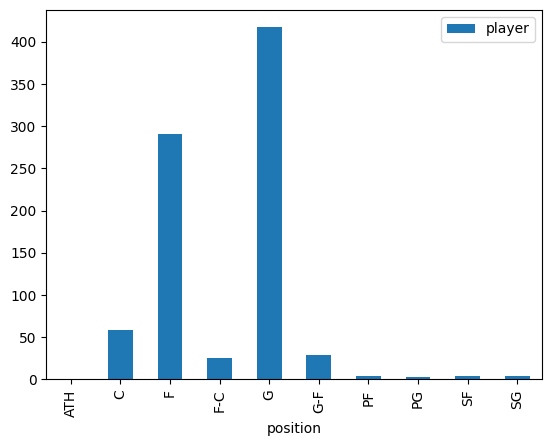

In [42]:
# Now for the fun stuff - most players drafted have been gaurds and forwards. Centers rarely get drafted
drafted_players_from_ncaa[['position', 'player']].groupby(by='position').count().plot(kind='bar')

position
ATH    Axes(0.125,0.11;0.775x0.77)
C      Axes(0.125,0.11;0.775x0.77)
F      Axes(0.125,0.11;0.775x0.77)
F-C    Axes(0.125,0.11;0.775x0.77)
G      Axes(0.125,0.11;0.775x0.77)
G-F    Axes(0.125,0.11;0.775x0.77)
PF     Axes(0.125,0.11;0.775x0.77)
PG     Axes(0.125,0.11;0.775x0.77)
SF     Axes(0.125,0.11;0.775x0.77)
SG     Axes(0.125,0.11;0.775x0.77)
Name: player, dtype: object

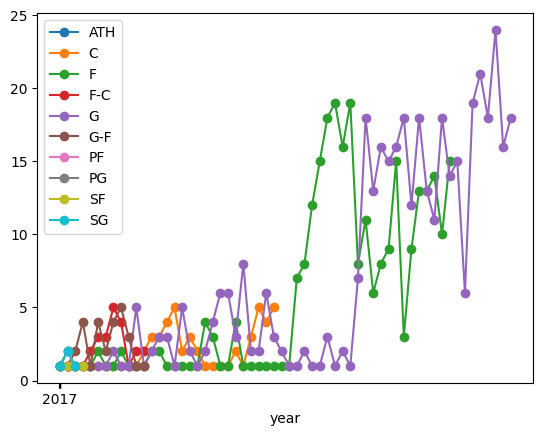

In [69]:
drafted_players_from_ncaa[['year','position', 'player']].groupby(['year', 'position']).count().reset_index('position').groupby('position')['player'].plot(marker='o', legend=True)